# Data Importing and Preperation



In [150]:
# Installing the required libraries.
# If in your local machine one of the libraries is not installed yet, please follow the same code line (!pip install [LIBRARY NAME])
# to install the library before importing.

!pip install scikit-posthocs

In [151]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

In [152]:
# Importing the data. In my machine the name and location of the data file can be different than yours. Please, check and correct the location and name of the file based on your machine
data = pd.read_csv('/content/Raw Data.csv')

In [153]:
# Checking the first 5 rows of the data
data.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q3_4,Q3_5,Q17,18,19,Q1,Q1.1,Q27,SC0,FL_8_DO
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Please read the statements carefully and selec...,Please read the statements carefully and selec...,Please indicate your gender,Please write your current age in years,What is the highest level of education you hav...,List of Countries,Which statement best describes your current em...,What is your current average monthly income af...,Score,FL_8 - Block Randomizer - Display Order
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/Ber...","{""ImportId"":""endDate"",""timeZone"":""Europe/Berlin""}","{""ImportId"":""status""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}",...,"{""ImportId"":""QID3_4""}","{""ImportId"":""QID3_5""}","{""ImportId"":""QID17""}","{""ImportId"":""QID32_TEXT""}","{""ImportId"":""QID36""}","{""ImportId"":""QID1215463262""}","{""ImportId"":""QID1215463435""}","{""ImportId"":""QID28""}","{""ImportId"":""SC_41nsMXDoTNYo8aW""}","{""ImportId"":""FL_8_DO""}"
2,6/27/2024 16:52,6/27/2024 16:54,IP Address,100,143,TRUE,6/27/2024 16:54,R_4FXNHGq8T7o1RXV,anonymous,EN,...,Agree,Agree,Male,25,University - Bachelors Degree,Austria,Unemployed,Less than 1000 Euro,85,Non-CSALowNegt
3,6/27/2024 16:47,6/27/2024 16:54,IP Address,100,431,TRUE,6/27/2024 16:54,R_8H1YRSs3bEUbiVj,anonymous,EN,...,Somewhat disagree,Somewhat disagree,Male,25,University - Bachelors Degree,Austria,Employed (Part-time),Less than 1000 Euro,68,CSAHighNegt
4,6/27/2024 16:52,6/27/2024 16:56,IP Address,100,229,TRUE,6/27/2024 16:56,R_8exI8dovzN6ieeY,anonymous,EN,...,Disagree,Somewhat agree,Female,25,University - Bachelors Degree,Austria,Unemployed,1000 - 2000 Euro,89,Non-CSAHighNegt


In [154]:
# Check how much rows and columns are there in the dataset
data.shape

(343, 42)

Our data has 341 inputs (respondents) and 43 columns in total

Why 341 not 343? Because we also have titles and column names which are also counted as a row number. So, 2 rows are counted for titles and column names and 341 rows are counted for the number of respondents

As it is visible from the table above, the data needs prepocessing. Firstly, second row should be deleted since they imply nothing. Later in our code, we will rename our column names.

---



In [155]:
# Delete the second row (index 1)
data.drop(1,inplace=True)

In [156]:
# Checking the data again
data.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q3_4,Q3_5,Q17,18,19,Q1,Q1.1,Q27,SC0,FL_8_DO
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Please read the statements carefully and selec...,Please read the statements carefully and selec...,Please indicate your gender,Please write your current age in years,What is the highest level of education you hav...,List of Countries,Which statement best describes your current em...,What is your current average monthly income af...,Score,FL_8 - Block Randomizer - Display Order
2,6/27/2024 16:52,6/27/2024 16:54,IP Address,100,143,TRUE,6/27/2024 16:54,R_4FXNHGq8T7o1RXV,anonymous,EN,...,Agree,Agree,Male,25,University - Bachelors Degree,Austria,Unemployed,Less than 1000 Euro,85,Non-CSALowNegt
3,6/27/2024 16:47,6/27/2024 16:54,IP Address,100,431,TRUE,6/27/2024 16:54,R_8H1YRSs3bEUbiVj,anonymous,EN,...,Somewhat disagree,Somewhat disagree,Male,25,University - Bachelors Degree,Austria,Employed (Part-time),Less than 1000 Euro,68,CSAHighNegt
4,6/27/2024 16:52,6/27/2024 16:56,IP Address,100,229,TRUE,6/27/2024 16:56,R_8exI8dovzN6ieeY,anonymous,EN,...,Disagree,Somewhat agree,Female,25,University - Bachelors Degree,Austria,Unemployed,1000 - 2000 Euro,89,Non-CSAHighNegt
5,6/27/2024 16:49,6/27/2024 16:56,IP Address,100,396,TRUE,6/27/2024 16:56,R_2wH6820qqJZvj2e,anonymous,EN,...,Neither agree nor disagree,Neither agree nor disagree,Female,23,University - Bachelors Degree,Austria,Employed (Part-time),Less than 1000 Euro,87,CSALowNegt


In [157]:
data.columns

Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6',
       'Q16_7', 'Q16_8', 'Q16_9', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q23', 'Q31',
       'Q32', 'Q25', 'Q4', 'Q5', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q17',
       '18', '19', 'Q1', 'Q1.1', 'Q27', 'SC0', 'FL_8_DO'],
      dtype='object')

We do not need some of the column for the next steps. These columns are: "StartDate", "EndDate", "Status", "Duration (in seconds)", "RecordedDate", "ResponseId", "DistributionChannel", "UserLanguage", "Q24", and "SC0".

- SC0 is the score of each participant. This score has been given by Qualtrics platfrom and has no relationship with our next analysis.


---



In [158]:
# Collecting the column names to delete
columns_to_delete = ["StartDate", "EndDate", "Status", "Duration (in seconds)", "RecordedDate", "ResponseId", "DistributionChannel", "UserLanguage", "SC0"]

# Starting to delete each column from the dataset
for i in columns_to_delete:
  data.drop(i,axis=1,inplace=True)

In [159]:
# Checking the dataset table again
data.head()

,Progress,Finished,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,...,Q3_3,Q3_4,Q3_5,Q17,18,19,Q1,Q1.1,Q27,FL_8_DO
0,Progress,Finished,Please read the statements carefully and selec...,Please read the statements carefully and selec...,Please read the statements carefully and selec...,Please read the statements carefully and selec...,Please read the statements carefully and selec...,Please read the statements carefully and selec...,Please read the statements carefully and selec...,Please read the statements carefully and selec...,...,Please read the statements carefully and selec...,Please read the statements carefully and selec...,Please read the statements carefully and selec...,Please indicate your gender,Please write your current age in years,What is the highest level of education you hav...,List of Countries,Which statement best describes your current em...,What is your current average monthly income af...,FL_8 - Block Randomizer - Display Order
2,100,TRUE,Somewhat agree,Strongly disagree,Strongly disagree,Disagree,Somewhat agree,Neither agree nor disagree,Disagree,Strongly disagree,...,Somewhat agree,Agree,Agree,Male,25,University - Bachelors Degree,Austria,Unemployed,Less than 1000 Euro,Non-CSALowNegt
3,100,TRUE,Somewhat disagree,Disagree,Strongly disagree,Strongly disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Neither agree nor disagree,...,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Male,25,University - Bachelors Degree,Austria,Employed (Part-time),Less than 1000 Euro,CSAHighNegt
4,100,TRUE,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,...,Somewhat agree,Disagree,Somewhat agree,Female,25,University - Bachelors Degree,Austria,Unemployed,1000 - 2000 Euro,Non-CSAHighNegt
5,100,TRUE,Somewhat disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat disagree,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Female,23,University - Bachelors Degree,Austria,Employed (Part-time),Less than 1000 Euro,CSALowNegt


Now, we check if all data for "Finished" column are True and all data for "Progress" column are 100 in order to detect uncomplete response(s). We will skip the first row, since it the first row represents what has been asked as a question in the survey. So there is no need to check the first row.

---



In [160]:
if all(data.iloc[1:]['Finished'] == 'True') and all(data.iloc[1:]['Progress'] == '100'):
    print("No incomplete response")
else:
    print("There is an incomplete response(s)")

There is an incomplete response(s)


In [161]:
# Now, we can delete "Finished" and "Progress" columns
data.drop("Finished", axis=1, inplace=True)
data.drop("Progress", axis=1, inplace=True)

In [162]:
# Check detailed information about the columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 342
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Q16_1    342 non-null    object
 1   Q16_2    342 non-null    object
 2   Q16_3    342 non-null    object
 3   Q16_4    342 non-null    object
 4   Q16_5    342 non-null    object
 5   Q16_6    342 non-null    object
 6   Q16_7    342 non-null    object
 7   Q16_8    342 non-null    object
 8   Q16_9    342 non-null    object
 9   Q6_1     342 non-null    object
 10  Q6_2     342 non-null    object
 11  Q6_3     342 non-null    object
 12  Q6_4     342 non-null    object
 13  Q23      342 non-null    object
 14  Q31      342 non-null    object
 15  Q32      342 non-null    object
 16  Q25      342 non-null    object
 17  Q4       342 non-null    object
 18  Q5       342 non-null    object
 19  Q3_1     342 non-null    object
 20  Q3_2     342 non-null    object
 21  Q3_3     342 non-null    object
 22  Q3_4   

Column name of "18" is about age of the respondents. It must be numeric data type not object

---

In [163]:
# Change the datatype into numeric and the name of the column into "Age"
data['18'] = pd.to_numeric(data['18'], errors='coerce')
data.loc[0, ["18"]] = "Age"

**Now we can correct the other column names.**
Each coumn represents one question. For example: Q16_1 represent question of "This post is useful/helpful" from the liker scale in the survey. Q16_2 represent question of "I am likely to suggest the brand to a friend" and so on. We will replace these numbers with their corresponding questions

In [164]:
# We will remove "Please read the statements carefully and select the option which mostly represent your opinion - " part from the questions and put them into the header position.
columns_to_modify = ['Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9']
pattern_to_remove = "Please read the statements carefully and select the option which mostly represent your opinion - "

for column in columns_to_modify:
  if data[column].dtype == object:
    data[column] = data[column].str.replace(pattern_to_remove, '', regex=False)

In [165]:
columns_to_modify = ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5',]
pattern_to_remove = "Please read the statements carefully and select the option which mostly represent your agreement or disagreement - "

for column in columns_to_modify:
  if data[column].dtype == object:
    data[column] = data[column].str.replace(pattern_to_remove, '', regex=False)

In [166]:
# After the correction of the questions, we can start to put these questions into the header position
new_columns = {}
for column in data.columns:
  new_columns[column] = data.loc[0, column]
data.rename(columns=new_columns, inplace=True)
data.drop(0, inplace=True)

In [167]:
data = data.reset_index(drop=True)

In [168]:
data.columns

Index(['This post is useful/helpful',
       'I am likely to suggest the brand to a friend',
       'I would like to recommend/introduce this brand to my friends by sharing, commenting or liking this post',
       'I would like to “Like” this brand post',
       'I would like to learn more about the brand',
       'The brand seems like a honest brand', 'I trust the brand',
       'The probability that I would buy from this brand is high',
       'If I were going to purchase a similar product, I would consider buying this brand',
       'I read the post after I check the engagement rate (likes, comments) of posts',
       'Social media post with a higher engagement rate is trustworthy',
       'If the post has a higher engagement rate, I express my reactions to brand posts and comments using the button "Like".',
       'I will likely purchase the product/service on the post which has a higher engagement rate (likes and comments)',
       'What was the name of the brand?',
       'How ma

Now, some column names should be changed. For example column name about the participants gender is "Please indicate your gender". We have to change this column name into "Gender".

---



In [169]:
data.rename(columns={"Please indicate your gender": "Gender",
                   "What is the highest level of education you have completed": "Education",
                   "List of Countries": "Country",
                   "Which statement best describes your current employment status?": "Employment",
                   "What is your current average monthly income after taxes (in Euro)?": "Income",
                   "FL_8 - Block Randomizer - Display Order": "Assigned_group",
                   "Has a company's CSA post on social media influenced you to purchase their product or service in the past year?": "CSA_influenced_purchase",
                   "Have you ever supported a company's CSA posts (e.g., by liking, commenting, sharing, or retweeting) in the past year?": "CSA_influenced_engage",
                   "Which social media platform do you use most often?": "Used_social_media"}, inplace=True)

In [170]:
# Checking one more time our column names
data.columns

Index(['This post is useful/helpful',
       'I am likely to suggest the brand to a friend',
       'I would like to recommend/introduce this brand to my friends by sharing, commenting or liking this post',
       'I would like to “Like” this brand post',
       'I would like to learn more about the brand',
       'The brand seems like a honest brand', 'I trust the brand',
       'The probability that I would buy from this brand is high',
       'If I were going to purchase a similar product, I would consider buying this brand',
       'I read the post after I check the engagement rate (likes, comments) of posts',
       'Social media post with a higher engagement rate is trustworthy',
       'If the post has a higher engagement rate, I express my reactions to brand posts and comments using the button "Like".',
       'I will likely purchase the product/service on the post which has a higher engagement rate (likes and comments)',
       'What was the name of the brand?',
       'How ma

In [171]:
# Copying the latest processed dataset into another variable (df). If we make a mistake in the future we can come here again and renew the data. Think this code as a "Checkpoint" of the analysis
df = data.copy()

Now our preprocessing is done. We can start to analyse our dataset

# Data Analysing

## Histograms for the distribution of the respondents

Histogram to see the distribution of the genders of the respondents

---



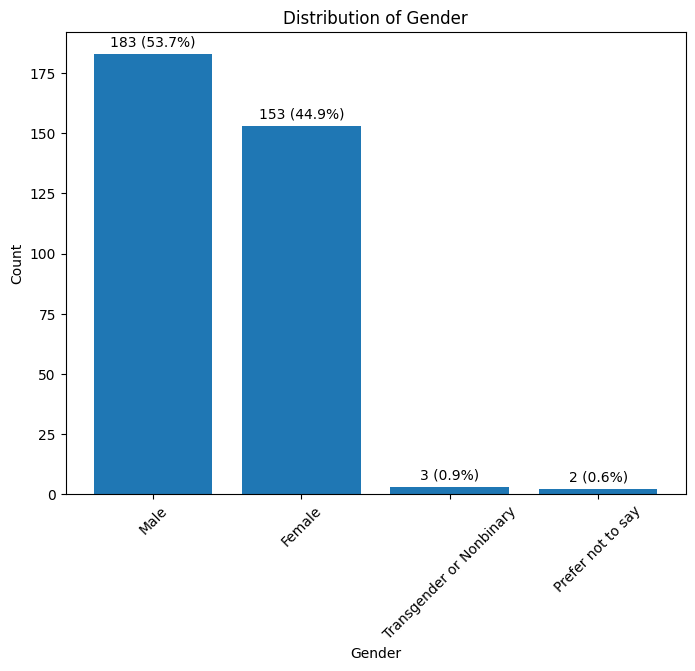

In [172]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values)

# Code to add total count and percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks(rotation=45)
plt.show()


Histogram to see the distribution of the age of the respondents

---


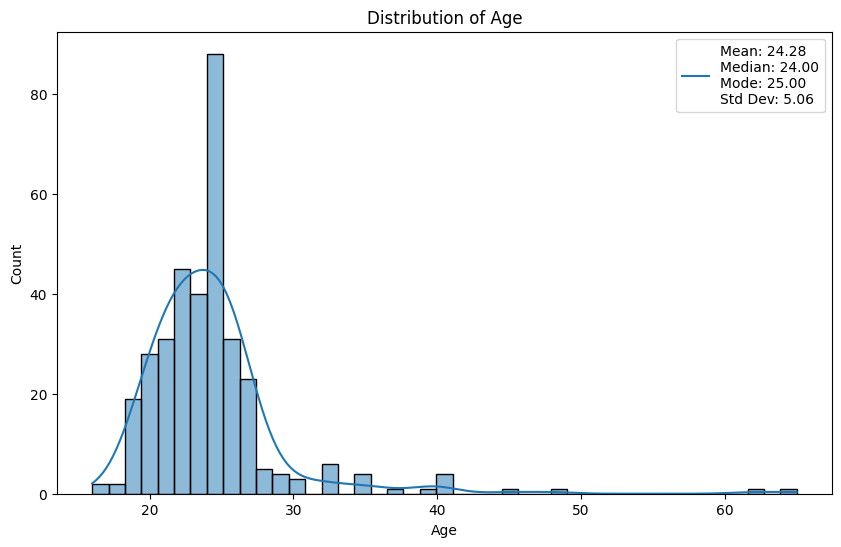

In [173]:
# Calculate descriptive statistics for the 'Age' column
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]
std_dev_age = df['Age'].std()

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Add descriptive statistics to the legend
legend_text = f'Mean: {mean_age:.2f}\nMedian: {median_age:.2f}\nMode: {mode_age:.2f}\nStd Dev: {std_dev_age:.2f}'
plt.legend([legend_text], loc='upper right')  # Position the legend

plt.show()

Histogram to see the distribution of the employment status of the respondents

---



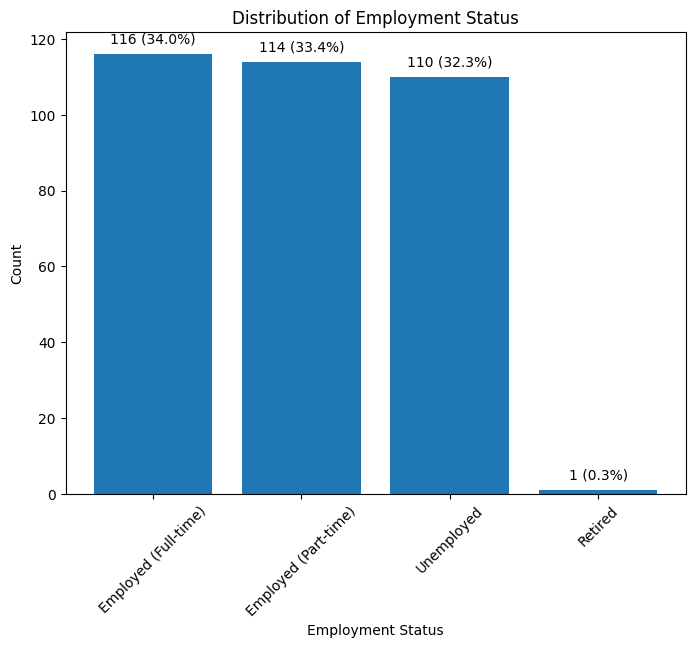

In [174]:
employment_counts = df['Employment'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(employment_counts.index, employment_counts.values)

# Code to add total count and percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Distribution of Employment Status')
plt.xticks(rotation=45)
plt.show()

Histogram to see the distribution of the income
of the respondents

---



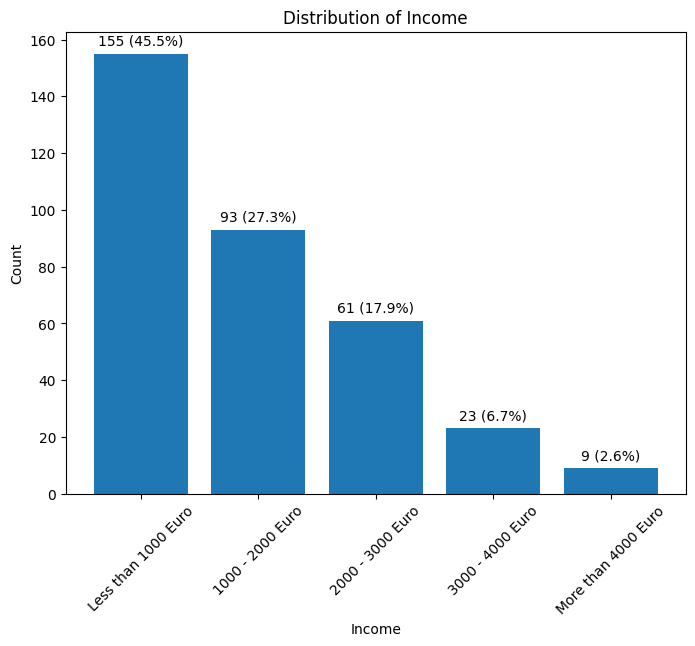

In [175]:
income_counts = df['Income'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(income_counts.index, income_counts.values)

# Code to add total count and percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.xticks(rotation=45)
plt.show()

Histogram to see the distribution of the education level of the respondents

---



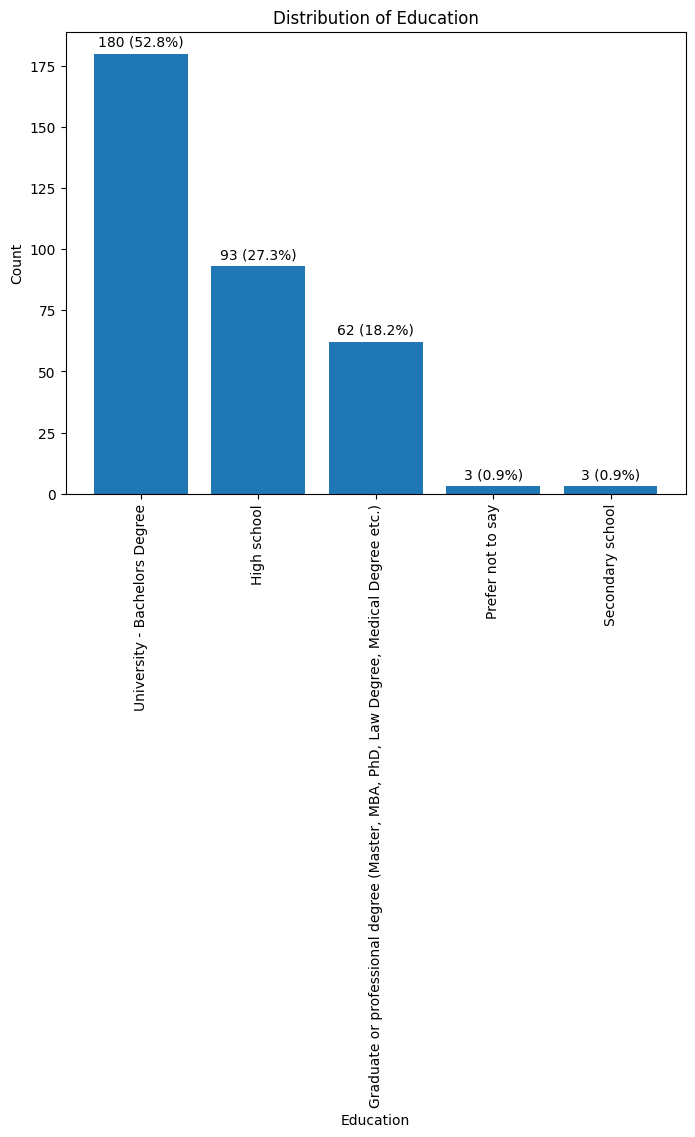

In [176]:
education_counts = df['Education'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(education_counts.index, education_counts.values)

# Code to add total count and percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.xticks(rotation=90)
plt.show()

Histogram to see the distribution of the reesidency of the respondents. Since there were more than 15 country name, only the first three top country requency were shown in the table.

---



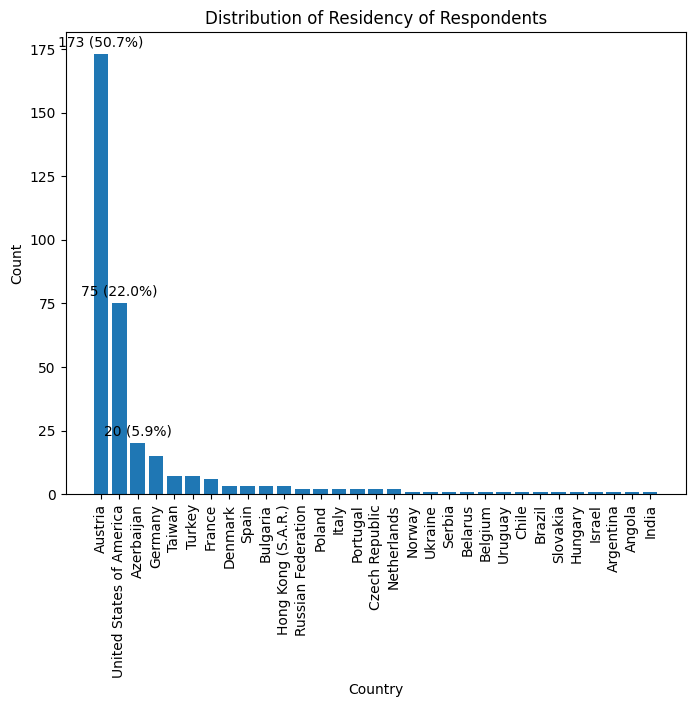

In [177]:
country_counts = df['Country'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(country_counts.index, country_counts.values)

# Add frequency and percentage labels to the first 3 bars
for i, bar in enumerate(bars[:3]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Residency of Respondents')
plt.xticks(rotation=90)
plt.show()

Histogram to see the distribution of the most used social media platform

---



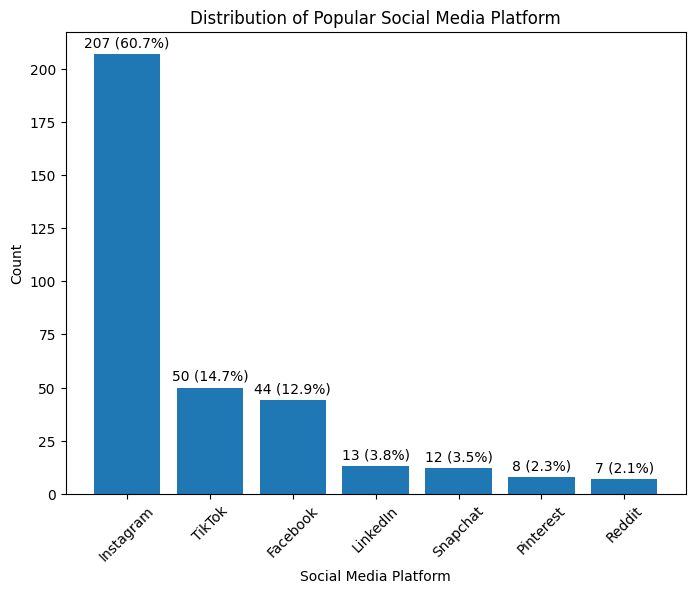

In [178]:
socia_media_counts = df['Used_social_media'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(socia_media_counts.index, socia_media_counts.values)

# Code to add total count and percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')


plt.xlabel('Social Media Platform')
plt.ylabel('Count')
plt.title('Distribution of Popular Social Media Platform')
plt.xticks(rotation=45)
plt.show()

Distribution of the respondents who have liked, commented or shared company's
CSA post in the past year

---



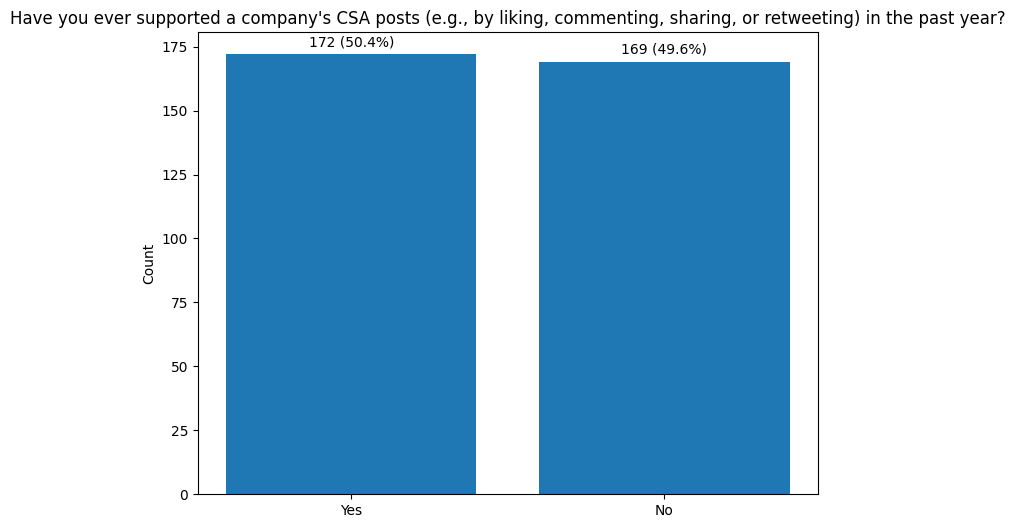

In [179]:
csa_influence_counts = df['CSA_influenced_engage'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(csa_influence_counts.index, csa_influence_counts.values)

# Code to add total count and percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.ylabel('Count')
plt.title("Have you ever supported a company's CSA posts (e.g., by liking, commenting, sharing, or retweeting) in the past year?")
plt.xticks(rotation=0)
plt.show()

Distribution of the respondents who have been influenced by CSA post and make a purchase decision

---



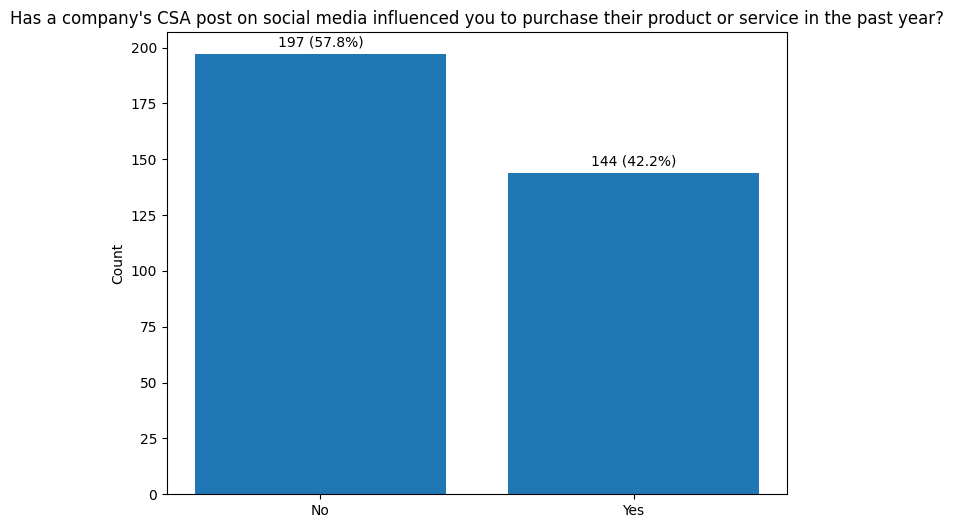

In [180]:
csa_purchase_counts = df['CSA_influenced_purchase'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(csa_purchase_counts.index, csa_purchase_counts.values)

# Code to add total count and percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.ylabel('Count')
plt.title("Has a company's CSA post on social media influenced you to purchase their product or service in the past year?")
plt.xticks(rotation=0)
plt.show()

## Distribution of the respondents' opinion about CSA activities of the companies

**I believe corporations should advocate for social issues**

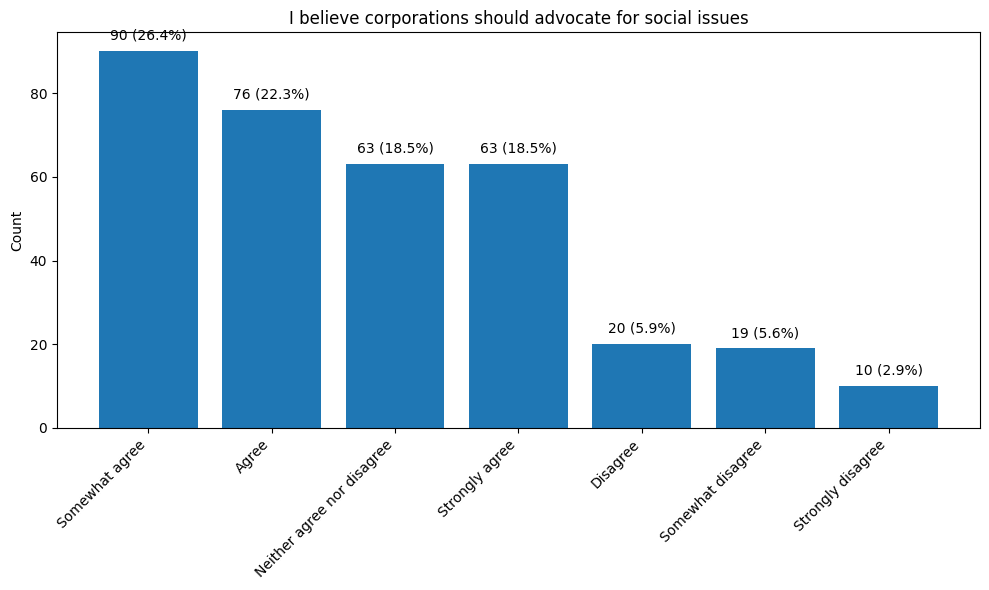

In [181]:
#Count the occurrences of each category
social_issue_counts = df['I believe corporations should advocate for social issues'].value_counts()

#Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(social_issue_counts.index, social_issue_counts.values)

# Add counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')


plt.ylabel('Count')
plt.title('I believe corporations should advocate for social issues')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**The company which involves in CSA cares about what happens to the community**

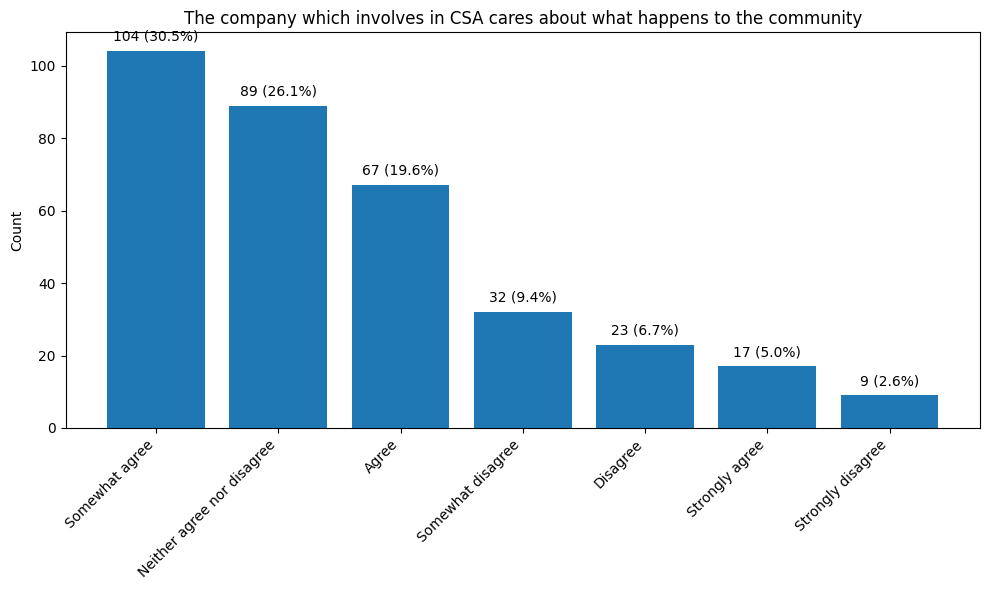

In [182]:
social_issue_counts = df['The company which involves in CSA cares about what happens to the community'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(social_issue_counts.index, social_issue_counts.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.ylabel('Count')
plt.title('The company which involves in CSA cares about what happens to the community')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**I would talk positively companies that take a stance on social issues**

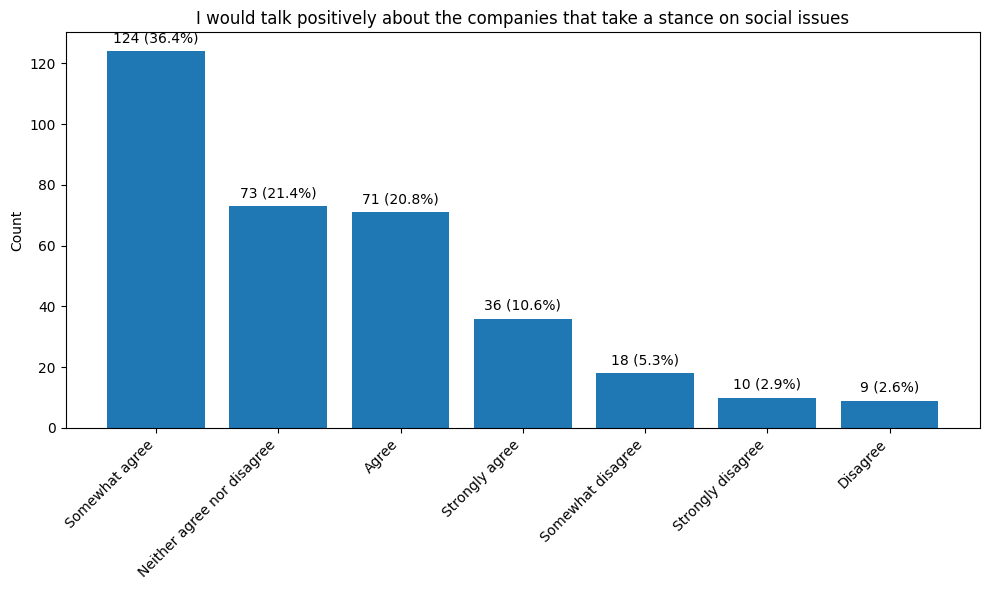

In [183]:
social_issue_counts = df['I would talk positively companies that take a stance on social issues'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(social_issue_counts.index, social_issue_counts.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.ylabel('Count')
plt.title('I would talk positively about the companies that take a stance on social issues')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**I would make a financial contribution to the company which involves in CSA activity**

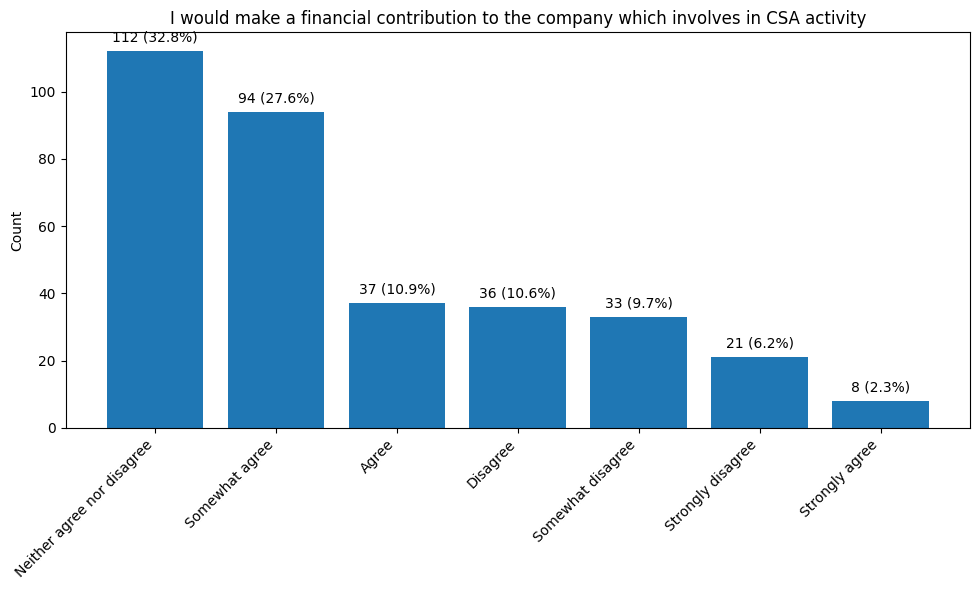

In [184]:
social_issue_counts = df['I would make a financial contribution to the company which involves in CSA activity'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(social_issue_counts.index, social_issue_counts.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.ylabel('Count')
plt.title('I would make a financial contribution to the company which involves in CSA activity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**I trust an activist brand**

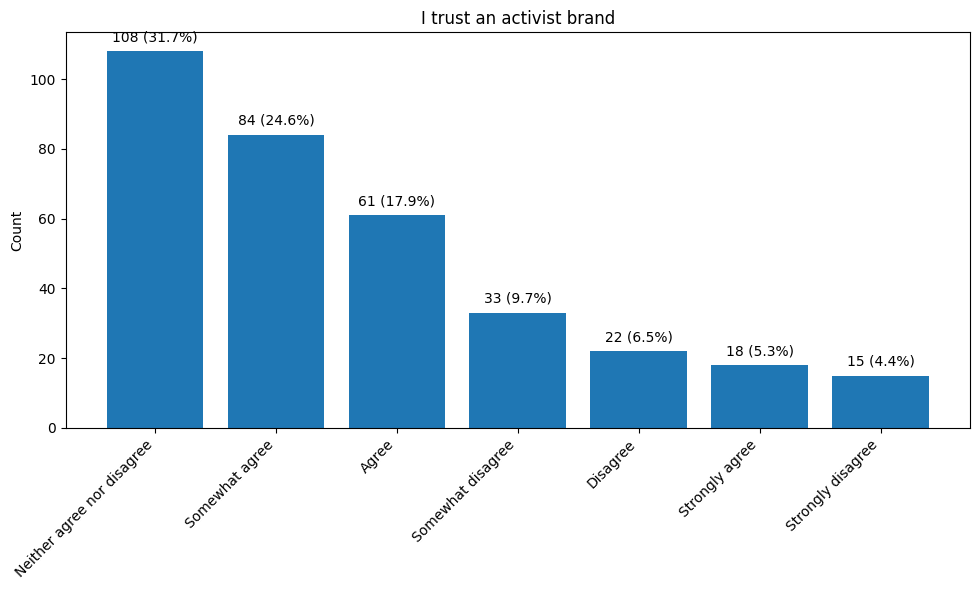

In [185]:
social_issue_counts = df['I trust an activist brand'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(social_issue_counts.index, social_issue_counts.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval} ({yval/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.ylabel('Count')
plt.title('I trust an activist brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analysing the "Attention Check" questions

Let's see how mnay people could not recall the company name in the shown Instagram post

In [186]:
# Count the occurrences of each value in the "What was the name of the brand?" column
brand_counts = df['What was the name of the brand?'].value_counts()

# Calculate the relative percentage of each value
brand_percentages = brand_counts / len(df) * 100

# Create a DataFrame to display the results
brand_summary = pd.DataFrame({'Count': brand_counts, 'Percentage': brand_percentages})
brand_summary


,Count,Percentage
What was the name of the brand?,,
DenimVibe,290,85.043988
DenimLife,31,9.090909
LifeDenim,11,3.225806
VibeDenim,9,2.639296


As it is visible from the table, few people, 14.94% of the respondents could not remember the brand name. To ensure the quality of the analysis, we need to remove the answer of these respondents from the data

In [187]:
#Remove participants who failed to remember the brand's name
df = df[df['What was the name of the brand?'] == 'DenimVibe']

Now, we will check how many people remembered the engagement rate and sentiment of the shown post. To do this, we will create new datasets from the original dataset. These datasets will include respondents which were assigned the post with either "Low" or "High" engagement rate, and  either "Positive" or "Negative" sentiment. Later, we will see whether these participants could successfully selecyted correct number of likes & comments, and overal tone of the Instagram post

---



**People who were shown LOW engagement rate**


In [188]:
# Create dataset which includes people who were shown Instagram post with LOW engagement rate.
low_engg = df[df['Assigned_group'].str.contains('Low', na=False)]

In [189]:
# Check how many of them remembered the engagement rate of the post
like_comm = "How many Likes and Comments did the post have?"
like_count = low_engg[like_comm].value_counts().get("342 Likes and 10 Comments", 0)

#Calculate percentage of poeple who remembered right engagement rate
like_prcntg = like_count / len(low_engg) * 100

print(f"Count of people selected correct engagement rate: {like_count}")
print(f"Percentage of these respondents: {like_prcntg}")

Count of people selected correct engagement rate: 104
Percentage of these respondents: 70.74829931972789


As it is visible from the result above, almost more than half of the participants, 31.4% of the respondent failed to select the correct engagement rate of the post. Removing their answers from the data could lead to mistakes in future results fo the analyse. Therefore, we will keep their answers.

**People who were shown HIGH engagement rate**

In [190]:
# Create dataset which includes people who were shown Instagram post with HIGH engagement rate.
high_engg = df[df['Assigned_group'].str.contains('High', na=False)]

In [191]:
# Check how many of them remembered the engagement rate of the post
like_comm = "How many Likes and Comments did the post have?"
like_count = high_engg[like_comm].value_counts().get("34,958 Likes and 1,578 Comments", 0)

#Calculate percentage of poeple who remembered right engagement rate
like_prcntg = like_count / len(high_engg) * 100

print(f"Count of people selected correct engagement rate: {like_count}")
print(f"Percentage of these respondents: {like_prcntg}")

Count of people selected correct engagement rate: 89
Percentage of these respondents: 62.23776223776224


The participants who were shown Instagram post with high engagement rate, 40.6% of them failed to pass the attention check question. We will keep their answers in order not to distort the whole dataset

**People who were shown POSITIVE sentiment**

In [192]:
# Create dataset which includes people who were shown Instagram post with POSITIVE sentiment.
pos_sent = df[df['Assigned_group'].str.contains('Post', na=False)]

In [193]:
# Check how many of them remembered the overal tone of the post
tone = "What was the overall tone (attitude) of the comments on the brand's post?"
sent_count = pos_sent[tone].value_counts().get("Positive", 0)

#Calculate percentage of poeple who remembered right engagement rate
sent_prcntg = sent_count / len(pos_sent) * 100

print(f"Count of people selected correct sentiment: {sent_count}")
print(f"Percentage of these respondents: {sent_prcntg}")

Count of people selected correct sentiment: 136
Percentage of these respondents: 91.2751677852349


90.5% of participants who were shown post with positive sentiment could remember the correct tone of the post after the survey. We will delete the rest answers, data of 9.5% of the participants.

In [194]:
# Keeping answers of 90.5% of the participants who were shown post with positive sentiment
df = df[
    ~(df['Assigned_group'].str.contains('Post', na=False) & (df["What was the overall tone (attitude) of the comments on the brand's post?"] != "Positive"))
]

**People who were shown NEGATIVE sentiment**

In [195]:
# Create dataset which includes people who were shown Instagram post with NEGATIVE sentiment.
negt_sent = df[df['Assigned_group'].str.contains('Negt', na=False)]

In [196]:
# Check how many of them remembered the overal tone of the post
tone = "What was the overall tone (attitude) of the comments on the brand's post?"
sent_count = negt_sent[tone].value_counts().get("Negative", 0)

#Calculate percentage of poeple who remembered right engagement rate
sent_prcntg = sent_count / len(pos_sent) * 100

print(f"Count of people selected correct sentiment: {sent_count}")
print(f"Percentage of these respondents: {sent_prcntg}")

Count of people selected correct sentiment: 123
Percentage of these respondents: 82.5503355704698


The number of participants, who were shown post with negative sentiment, could not remmeber correct tone of the post after the survey is 16.1%. We will delete these answers too.

In [197]:
# Keeping answers of 83.9% of the participants who were shown post with negative sentiment
df = df[
    ~(df['Assigned_group'].str.contains('Negt', na=False) & (df["What was the overall tone (attitude) of the comments on the brand's post?"] != "Negative"))
]

Now, let's check how many answers we have

---



In [198]:
df.shape

(259, 31)

In [199]:
# Count of answers for each group

assigned_group_counts = df['Assigned_group'].value_counts()
assigned_group_counts


,count
Assigned_group,
Non-CSAHighPost,35
CSALowPost,35
Non-CSALowPost,35
CSAHighNegt,34
CSALowNegt,32
CSAHighPost,31
Non-CSAHighNegt,30
Non-CSALowNegt,27


We have totally 259 valid answers. And answer count for each group varies between 35 and 27. These results are sufficient to perform hypotheses analysis.

# Analysis of Hypotheses

For this section, we will use question block which was presented before the survey, in other words "Questions After Experiment" (qae)

In [200]:
#creating new dataset which contains the answers for questions after the survey and the assigned Instagram post of the respondent
qae = pd.concat([df.iloc[:, 0:9], df.iloc[:, -1:]], axis=1)

In [201]:
qae.head(3)

,This post is useful/helpful,I am likely to suggest the brand to a friend,"I would like to recommend/introduce this brand to my friends by sharing, commenting or liking this post",I would like to “Like” this brand post,I would like to learn more about the brand,The brand seems like a honest brand,I trust the brand,The probability that I would buy from this brand is high,"If I were going to purchase a similar product, I would consider buying this brand",Assigned_group
0,Somewhat agree,Strongly disagree,Strongly disagree,Disagree,Somewhat agree,Neither agree nor disagree,Disagree,Strongly disagree,Somewhat disagree,Non-CSALowNegt
1,Somewhat disagree,Disagree,Strongly disagree,Strongly disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Neither agree nor disagree,Somewhat disagree,CSAHighNegt
2,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Non-CSAHighNegt


## Correlation Map

Let's see correlation map of the statements.
First, we have to encode the categorical answers (Strongly Disagree, Disagree, Somewhat Disagree, Neutral, Somewhat Agree, Agree, Strongly Agree) into the numeric type (1, 2, 3, 4, 5, 6, 7)

In [202]:
#Defining a number for each category
categories_to_change = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Somewhat disagree": 3,
    "Neither agree nor disagree": 4,
    "Somewhat agree": 5,
    "Agree": 6,
    "Strongly agree": 7
}

#changing all categories with their corresponding values in the dataset of qae
for col in qae.columns[:9]:
    qae[col] = qae[col].map(categories_to_change)

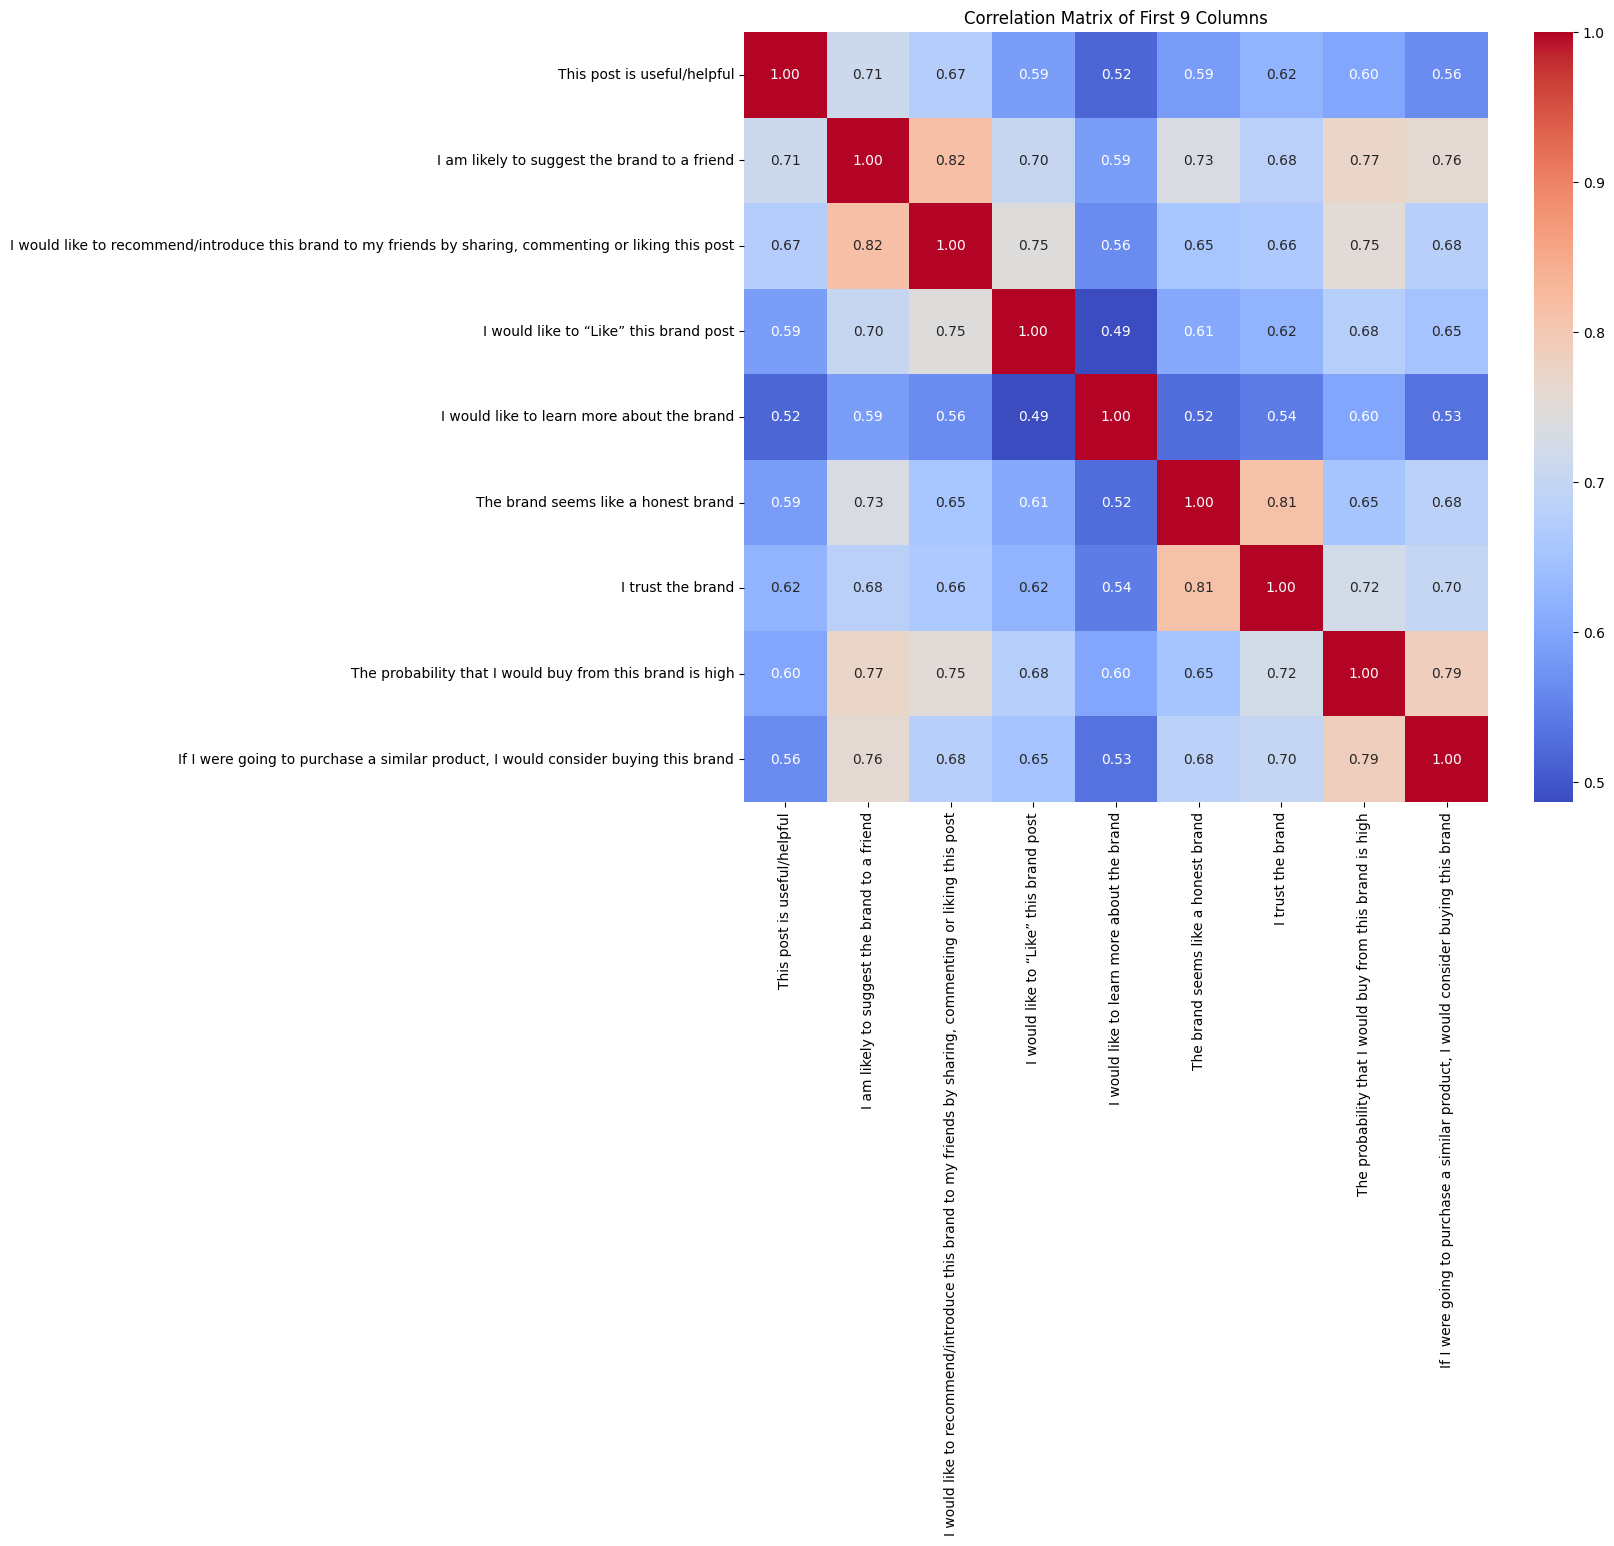

In [203]:
correlation_matrix = qae.iloc[:, :9].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of First 9 Columns')
plt.show()

***Interpretation of the Heatmap***

According to the chart, there is a positive correlation between trustworthiness (e.g. I trust the brand) and purchase intention (e.g. The probability that I would buy from this brand is high), and also between recommendation (e.g. I am likely to suggest the brand to a friend) and purchase intention. This suggests that respondents who find the brand trustworthy are more likely to consider purchasing from it, and respondents who are willing to share the brand with their friends are more likely to purchase from the brand. However, there is a weak correlation between trustworthiness and recommendation.

Moreover, according to the heatmap, the positive correlation between "suggesting the brand to a friend" and "perceiving the brand as an honest brand" is higher than the correlation between "suggesting the brand to a friend" and "trusting the brand". This can propose that for brands earning the trust of the customers is harder than being perceived as an honest brand. However, as mentioned above, trust in the brand correlates to the willingness to purchase. So, this can suggest that brands should focus on developing trust among the customers to drive more sales.

Now, we can start to analyse how does content of post (CSA or Non-CSA), engagement rate of post (High or Less) and sentiment of post (Positive or Negative) affect these decisions.

## Three-Way ANOVA & Tukey HSD tests

Three-way ANOVA (or three-factor ANOVA) analyzes the effects of three independent variables (factors) on a continuous dependent variable (response). The reserch is also cosntructed by three factors:
*   Post type: CSA vs Non-CSA
*   Engagement Amount: High vs Low
*   Sentiment: Positive vs Negative

Since we have 8 groups (2 * 2 * 2 = 8) it is best to use Three-Way ANOVA test.

Tukey's HSD (Honestly Significant Difference) test is a post-hoc analysis used after ANOVA to determine which specific group means are significantly different from each other. So, we will use also Tukey HSD test to see the effects of each group and analyze our hypotheses.

---




First, we have to create new columns. These columns will indicate the participant has been given either CSA or Non-CSA, either High or Low engagement, and either Positive or Negative sentiment.

In [204]:
# Create new columns with default values
qae['is_csa'] = 0
qae['engg_amount'] = 0
qae['sentiment'] = 0

# Update 'is_csa' column. If the shown post was CSA, then assign 1, otherwise assign 0
qae.loc[qae['Assigned_group'].str.contains('Non-CSA', case=False, na=False), 'is_csa'] = 0
qae.loc[(qae['Assigned_group'].str.contains('CSA', case=False, na=False)) & (~qae['Assigned_group'].str.contains('Non-CSA', case=False, na=False)), 'is_csa'] = 1


# Update 'engg_amount' column. If the shown post had high engagement, then assign 1, otherwise assign 0
qae.loc[qae['Assigned_group'].str.contains('High', case=False, na=False), 'engg_amount'] = 1

# Update 'sentiment' column. If the shown post had positive sentiment, then assign 1, otherwise assign 0
qae.loc[qae['Assigned_group'].str.contains('Post', case=False, na=False), 'sentiment'] = 1


# Changing types of new columns into "category" type because Three-Way ANOVA requires this
qae['is_csa'] = qae['is_csa'].astype('category')
qae['engg_amount'] = qae['engg_amount'].astype('category')
qae['sentiment'] = qae['sentiment'].astype('category')


# Replacing all spaces with "_" (underscore) in the column names. Otherwise the code for the model will not work
qae = qae.rename(columns=lambda x: x.replace(' ', '_'))

### H1: CSA posts with high engagement and positive sentiment increase brand honesty and improve the trust towards the brand

Let's check if there is significant effet of sentiment, engagement rate on the CSA and Non-CSA post for influencing consumer's honesty and trust perception.
We will check answers from two statements:

1.   The brand seems like a honest brand
2.   I trust the brand

---




Model for the statement of "The brand seems like a honest brand"

In [205]:
model = ols('The_brand_seems_like_a_honest_brand ~ C(is_csa) * C(engg_amount) * C(sentiment)', data=qae).fit()
anova_table = anova_lm(model, typ=2)

In [206]:
print("Three-Way ANOVA Results for 'The brand seems like a honest brand':")
print(anova_table)

Three-Way ANOVA Results for 'The brand seems like a honest brand':
                                           sum_sq     df           F  \
C(is_csa)                                0.045193    1.0    0.027130   
C(engg_amount)                           0.934143    1.0    0.560789   
C(sentiment)                           299.275292    1.0  179.662462   
C(is_csa):C(engg_amount)                 1.443818    1.0    0.866760   
C(is_csa):C(sentiment)                  17.465478    1.0   10.484964   
C(engg_amount):C(sentiment)              2.571368    1.0    1.543657   
C(is_csa):C(engg_amount):C(sentiment)    0.143488    1.0    0.086140   
Residual                               418.106806  251.0         NaN   

                                             PR(>F)  
C(is_csa)                              8.693025e-01  
C(engg_amount)                         4.546436e-01  
C(sentiment)                           2.910720e-31  
C(is_csa):C(engg_amount)               3.527484e-01  
C(is_csa):C(se

In [207]:
posthoc = pairwise_tukeyhsd(qae['The_brand_seems_like_a_honest_brand'], qae['Assigned_group'], alpha=0.05)
print(posthoc)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CSAHighNegt     CSAHighPost   2.4203    0.0  1.4406     3.4   True
    CSAHighNegt      CSALowNegt    0.011    1.0 -0.9606  0.9827  False
    CSAHighNegt      CSALowPost   2.9235    0.0  1.9736  3.8735   True
    CSAHighNegt Non-CSAHighNegt   0.6235 0.5325 -0.3647  1.6117  False
    CSAHighNegt Non-CSAHighPost    2.095    0.0   1.145  3.0449   True
    CSAHighNegt  Non-CSALowNegt   0.4346 0.8958 -0.5823  1.4516  False
    CSAHighNegt  Non-CSALowPost   2.2092    0.0  1.2593  3.1592   True
    CSAHighPost      CSALowNegt  -2.4093    0.0 -3.4035 -1.4151   True
    CSAHighPost      CSALowPost   0.5032 0.7614 -0.4698  1.4762  False
    CSAHighPost Non-CSAHighNegt  -1.7968    0.0 -2.8071 -0.7864   True
    CSAHighPost Non-CSAHighPost  -0.3253 0.9708 -1.2984  0.6477  False
    CS

Model for the statement of "I trust the brand"

In [208]:
model = ols('I_trust_the_brand ~ C(is_csa) * C(engg_amount) * C(sentiment)', data=qae).fit()
anova_table = anova_lm(model, typ=2)

In [209]:
print("Three-Way ANOVA Results for 'I trust the brand':")
print(anova_table)

Three-Way ANOVA Results for 'I trust the brand':
                                           sum_sq     df           F  \
C(is_csa)                                1.191755    1.0    0.892199   
C(engg_amount)                           0.135713    1.0    0.101601   
C(sentiment)                           201.630216    1.0  150.949076   
C(is_csa):C(engg_amount)                 0.238684    1.0    0.178689   
C(is_csa):C(sentiment)                   5.492721    1.0    4.112088   
C(engg_amount):C(sentiment)              2.998459    1.0    2.244776   
C(is_csa):C(engg_amount):C(sentiment)    0.022031    1.0    0.016494   
Residual                               335.273229  251.0         NaN   

                                             PR(>F)  
C(is_csa)                              3.457904e-01  
C(engg_amount)                         7.501820e-01  
C(sentiment)                           1.766521e-27  
C(is_csa):C(engg_amount)               6.728644e-01  
C(is_csa):C(sentiment)          

In [210]:
posthoc = pairwise_tukeyhsd(qae['I_trust_the_brand'], qae['Assigned_group'], alpha=0.05)
print(posthoc)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CSAHighNegt     CSAHighPost   1.8596    0.0  0.9823  2.7369   True
    CSAHighNegt      CSALowNegt  -0.1949 0.9973  -1.065  0.6753  False
    CSAHighNegt      CSALowPost   2.0605    0.0  1.2098  2.9112   True
    CSAHighNegt Non-CSAHighNegt    0.251 0.9887 -0.6339  1.1359  False
    CSAHighNegt Non-CSAHighPost   1.4891    0.0  0.6384  2.3398   True
    CSAHighNegt  Non-CSALowNegt  -0.1046    1.0 -1.0152  0.8061  False
    CSAHighNegt  Non-CSALowPost   1.6034    0.0  0.7527   2.454   True
    CSAHighPost      CSALowNegt  -2.0544    0.0 -2.9447 -1.1642   True
    CSAHighPost      CSALowPost   0.2009 0.9968 -0.6704  1.0722  False
    CSAHighPost Non-CSAHighNegt  -1.6086    0.0 -2.5134 -0.7038   True
    CSAHighPost Non-CSAHighPost  -0.3705 0.8983 -1.2418  0.5008  False
    CS

**Insights from the results for "The brand seems like a honest brand"**

According to the result of three-way ANOVA, sentiment has a massive, statistically significant effect (F=179.66, p=2.91e-31), confirming it is the strongest predictor of perceived honesty.
CSA (is_csa) and engagement amount (engg_amount) alone are not significant (p=0.869 and p=0.455, respectively).
CSA × Sentiment Interaction is highly significant (F=10.48, p=1.365725e-03 ≈ 0.0014), meaning CSA’s impact on honesty perception depends on sentiment. For example:

- High CSA combined with positive sentiment likely boosts honesty perception.
- Low CSA combined with negative sentiment may harm it.

Three-way interaction (CSA × Engagement × Sentiment) is not significant (p=0.769), indicating no combined effect of all three factors together. Other two-way interactions (e.g., CSA × Engagement) are insignificant too.

According to the result of Tukey HSD Post-Hoc Comparisons, CSA + High Engagement + Positive Sentiment (CSAHighPost) outperforms most groups, including Non-CSAHighPost (meandiff=2.095, p<0.05) and CSALowPost (meandiff=0.5032, p=0.761).
CSA +Low Engagement + Positive Sentiment (CSALowPost) still differs significantly from Non-CSA groups (e.g., vs. Non-CSALowNegt: meandiff=-2.4889, p<0.05). These results shows Sentiment is significant element for building honesty.

***Key takeaway*** -> Sentiment dominates. Positive sentiment is the strongest driver of honesty perception. CSA initiatives enhance honesty perception only when paired with positive sentiment. Engagement amount alone does not drive differences.

---

**Insights from the results for "I trust the brand"**

According to the result of three-way ANOVA, sentiment has an extremely strong, significant effect on trust (F=150.95, p=1.77e-27).
Positive sentiment ("Post") drastically increases trust, while negative sentiment ("Negt") reduces it. CSA (is_esa) and engagement amount (engg_amount) alone are not significant (p=0.346 and p=0.750, respectively).
CSA × Sentiment Interaction is marginally significant (F=4.11, p=0.0436), indicating that CSA’s impact on trust depends on sentiment:

- CSA + Positive Sentiment ("Post") likely boosts trust.
- CSA + Negative Sentiment ("Negt") may harm trust.

Other interactions (CSA × Engagement, Engagement × Sentiment, and the three-way interaction) are not significant.

According to the result of Tukey HSD Post-Hoc Comparisons, Negative sentiment consistently reduces trust, even in CSA groups:

- CSAHighNegt vs. CSAHighPost: meandiff=-1.8596, p<0.05.
- Non-CSAHighNegt vs. Non-CSAHighPost: meandiff=1.2381, p<0.05.

Engagement (High vs Low) Alone Has No Impact. Within the same CSA/sentiment group, High vs Low engagement shows no significant differences:

- CSAHighNegt vs CSALowNegt: -0.19, p=0.997 (not significant).
- CSAHighPost vs CSALowPost: +0.20, p=0.997 (not significant).
- Non-CSAHighPost vs Non-CSALowPost: +0.11, p=1.0 (not significant).


Non-CSA posts with positive sentiment (Non-CSAHighPost) show higher trust than non-CSA negative sentiment groups (e.g., vs. Non-CSALowNegt: meandiff=-1.5937, p<0.05).

***Key takeaway*** -> Here, sentiment is still significant element of building trust. Positive sentiment is the strongest predictor of trust, regardless of CSA or engagement level. CSA enhances trust only when paired with positive sentiment. Negative sentiment negates CSA’s benefits. Engagement Alone Isn’t Enough, but high engagement boosts trust only if combined with positive sentiment.

---

**Hypothesis 1 is REJECTED**❌

### H2: CSA posts with high engagement and positive sentiment increase the purchase intention of the customers

Let's check if there is significant effet of sentiment, engagement rate on the CSA and Non-CSA post for influencing consumer's purchase decision. We will check answers from two statements:

1.   The probability that I would buy from this brand is high
2.   If I were going to purchase a similar product, I would consider buying this brand

---



Model for the statement of "The probability that I would buy from this brand is high"

In [211]:
model = ols('The_probability_that_I_would_buy_from_this_brand_is_high ~ C(is_csa) * C(engg_amount) * C(sentiment)', data=qae).fit()
anova_table = anova_lm(model, typ=2)

In [212]:
print("Three-Way ANOVA Results for 'The probability that I would buy from this brand is high':")
print(anova_table)

Three-Way ANOVA Results for 'The probability that I would buy from this brand is high':
                                           sum_sq     df           F  \
C(is_csa)                                4.992284    1.0    3.348364   
C(engg_amount)                           0.352308    1.0    0.236295   
C(sentiment)                           219.243735    1.0  147.048475   
C(is_csa):C(engg_amount)                 4.518843    1.0    3.030823   
C(is_csa):C(sentiment)                   0.629912    1.0    0.422487   
C(engg_amount):C(sentiment)              1.892834    1.0    1.269538   
C(is_csa):C(engg_amount):C(sentiment)    0.108956    1.0    0.073078   
Residual                               374.231541  251.0         NaN   

                                             PR(>F)  
C(is_csa)                              6.845788e-02  
C(engg_amount)                         6.273188e-01  
C(sentiment)                           6.055001e-27  
C(is_csa):C(engg_amount)               8.292190

In [213]:
posthoc = pairwise_tukeyhsd(qae['The_probability_that_I_would_buy_from_this_brand_is_high'], qae['Assigned_group'], alpha=0.05)
print(posthoc)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CSAHighNegt     CSAHighPost   1.8131    0.0  0.8862    2.74   True
    CSAHighNegt      CSALowNegt    0.046    1.0 -0.8733  0.9652  False
    CSAHighNegt      CSALowPost   2.1218    0.0  1.2231  3.0206   True
    CSAHighNegt Non-CSAHighNegt   0.1314 0.9999 -0.8035  1.0663  False
    CSAHighNegt Non-CSAHighPost   1.6647    0.0   0.766  2.5634   True
    CSAHighNegt  Non-CSALowNegt   -0.439 0.8591 -1.4011  0.5231  False
    CSAHighNegt  Non-CSALowPost   1.5218    0.0  0.6231  2.4206   True
    CSAHighPost      CSALowNegt  -1.7671    0.0 -2.7077 -0.8265   True
    CSAHighPost      CSALowPost   0.3088 0.9703 -0.6118  1.2293  False
    CSAHighPost Non-CSAHighNegt  -1.6817    0.0 -2.6376 -0.7258   True
    CSAHighPost Non-CSAHighPost  -0.1484 0.9997 -1.0689  0.7722  False
    CS

Model for the statement of "If I were going to purchase a similar product, I would consider buying this brand"

In [214]:
model = ols('Q("If_I_were_going_to_purchase_a_similar_product,_I_would_consider_buying_this_brand") ~ C(is_csa) * C(engg_amount) * C(sentiment)', data=qae).fit()
anova_table = anova_lm(model, typ=2)

In [215]:
print("Three-Way ANOVA Results for 'If I were going to purchase a similar product, I would consider buying this brand':")
print(anova_table)

Three-Way ANOVA Results for 'If I were going to purchase a similar product, I would consider buying this brand':
                                           sum_sq     df           F  \
C(is_csa)                                9.819718    1.0    7.089559   
C(engg_amount)                           0.045904    1.0    0.033141   
C(sentiment)                           224.015469    1.0  161.732853   
C(is_csa):C(engg_amount)                 7.911209    1.0    5.711670   
C(is_csa):C(sentiment)                   2.475448    1.0    1.787204   
C(engg_amount):C(sentiment)              0.253413    1.0    0.182957   
C(is_csa):C(engg_amount):C(sentiment)    3.477925    1.0    2.510964   
Residual                               347.659004  251.0         NaN   

                                             PR(>F)  
C(is_csa)                              8.254536e-03  
C(engg_amount)                         8.556929e-01  
C(sentiment)                           6.238338e-29  
C(is_csa):C(engg_amoun

In [216]:
posthoc = pairwise_tukeyhsd(qae['If_I_were_going_to_purchase_a_similar_product,_I_would_consider_buying_this_brand'], qae['Assigned_group'], alpha=0.05)
print(posthoc)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CSAHighNegt     CSAHighPost   2.2258    0.0  1.3324  3.1192   True
    CSAHighNegt      CSALowNegt   0.5312 0.5984 -0.3548  1.4173  False
    CSAHighNegt      CSALowPost   2.4286    0.0  1.5623  3.2948   True
    CSAHighNegt Non-CSAHighNegt      0.4 0.8756 -0.5011  1.3011  False
    CSAHighNegt Non-CSAHighPost   1.7714    0.0  0.9052  2.6377   True
    CSAHighNegt  Non-CSALowNegt  -0.2593 0.9896 -1.1866  0.6681  False
    CSAHighNegt  Non-CSALowPost   1.7143    0.0   0.848  2.5805   True
    CSAHighPost      CSALowNegt  -1.6946    0.0 -2.6011  -0.788   True
    CSAHighPost      CSALowPost   0.2028  0.997 -0.6845    1.09  False
    CSAHighPost Non-CSAHighNegt  -1.8258    0.0 -2.7471 -0.9045   True
    CSAHighPost Non-CSAHighPost  -0.4544 0.7705 -1.3416  0.4329  False
    CS

**Insights from the results for "The probability that I would buy from this brand is high"**

According to the result of three-way ANOVA, sentiment has a significant main effect (F=147.05, p<0.001), indicating that positive posts drive higher purchase intent than negative ones. CSA (is_csa) and engagement (engg_amount) alone are not significant (p=0.068 and p=0.627, respectively).
The CSA × engagement interaction is marginally significant (p=0.083), suggesting CSA posts might perform differently depending on engagement level.
Other two-way and three-way interactions are not significant.

According to the result of TukeyHSD Post-Hoc Comparisons, Positive sentiment (Post) consistently outperforms negative sentiment (Negt) when engagement is high:

- CSAHighPost > CSAHighNegt (+1.81), Non-CSAHighPost > Non-CSAHighNegt (+1.53).

Even low-engagement CSA posts with positive sentiment (CSALowPost) outperform negative ones (CSALowNegt) (+2.08).

CSAHighPost > Non-CSAHighPost (+1.66), showing CSA posts with high engagement and positive sentiment drive stronger purchase intent than non-CSA equivalents.

CSAHighPost > CSALowPost (+0.31, not significant), but CSAHighPost > CSALowNegt (+1.77), highlighting that high engagement amplifies CSA’s impact when sentiment is positive.

***Key takeaway*** -> Positive sentiment is the strongest driver of purchase intent, regardless of CSA. ⏩CSA combined with high engagement and positive sentiment yields the highest purchase intent, outperforming non-CSA equivalents.⏪ Negative sentiment severely undermines effectiveness, even for CSA posts.

---

**Insights from the results for "If I were going to purchase a similar product, I would consider buying this brand"**

According to the result of three-way ANOVA, sentiment has an extremely strong effect (F=161.73, p<6.24e-29), indicating that positive posts drastically increase purchase consideration compared to negative ones. CSA (is_csa) has a significant main effect (p=0.008), meaning CSA-related posts generally boost purchase intent.
Engagement level (engg_amount) alone has no significant impact (p=0.856).
CSA × Engagement interaction is significant (p=0.0176), suggesting that the effect of CSA depends on engagement level.
All other interactions (including three-way) are not significant.

According to the result of TukeyHSD Post-Hoc Comparisons, positive sentiment (Post) consistently outperforms negative sentiment (Negt) across all scenarios:

- CSAHighPost > CSAHighNegt (+2.23), Non-CSAHighPost > Non-CSAHighNegt (+1.37).

Even low-engagement CSA posts with positive sentiment (CSALowPost) outperform their negative counterparts (CSALowNegt) (+1.90).

CSAHighPost significantly outperforms Non-CSAHighPost (+1.77) and Non-CSAHighNegt (+1.83), showing that ⏩CSA posts with high engagement and positive sentiment drive stronger purchase consideration.⏪

***Key takeaway*** -> Positive sentiment is the strongest driver of purchase consideration. CSA amplifies this effect when combined with high engagement, making it a strategic tool for brands aiming to influence consumer decisions.

---

**Hypothesis 2 is ACCEPTED**✅

### H3: CSA posts with High Engagement and Positive sentiment increase the perception of post usefulness and likelihood of the share of the post

Let's check if there is significant effet of sentiment, engagement rate on the CSA and Non-CSA post for influencing consumer's purchase decision. We will check answers from five statements:

1.   This post is useful/helpful
2.   I am likely to suggest the brand to a friend
3.   I would like to recommend/introduce this brand to my friends by sharing, commenting or liking this post
4.   I would like to “Like” this brand post
5.   I would like to learn more about the brand

Model for the statement of "This post is useful/helpful"

In [217]:
model = ols('Q("This_post_is_useful/helpful") ~ C(is_csa) * C(engg_amount) * C(sentiment)', data=qae).fit()
anova_table = anova_lm(model, typ=2)

In [218]:
print("Three-Way ANOVA Results for 'This post is useful/helpful':")
print(anova_table)

Three-Way ANOVA Results for 'This post is useful/helpful':
                                           sum_sq     df           F  \
C(is_csa)                                0.408337    1.0    0.366420   
C(engg_amount)                           0.387406    1.0    0.347637   
C(sentiment)                           129.972635    1.0  116.630471   
C(is_csa):C(engg_amount)                 0.000630    1.0    0.000565   
C(is_csa):C(sentiment)                   3.891608    1.0    3.492120   
C(engg_amount):C(sentiment)              0.319285    1.0    0.286509   
C(is_csa):C(engg_amount):C(sentiment)    1.593290    1.0    1.429733   
Residual                               279.713622  251.0         NaN   

                                             PR(>F)  
C(is_csa)                              5.455092e-01  
C(engg_amount)                         5.559840e-01  
C(sentiment)                           1.403653e-22  
C(is_csa):C(engg_amount)               9.810568e-01  
C(is_csa):C(sentiment)

In [219]:
posthoc = pairwise_tukeyhsd(qae['This_post_is_useful/helpful'], qae['Assigned_group'], alpha=0.05)
print(posthoc)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CSAHighNegt     CSAHighPost   1.7476    0.0  0.9463   2.549   True
    CSAHighNegt      CSALowNegt   0.1599 0.9987 -0.6348  0.9547  False
    CSAHighNegt      CSALowPost   1.7412    0.0  0.9642  2.5182   True
    CSAHighNegt Non-CSAHighNegt   0.3412 0.9019 -0.4671  1.1495  False
    CSAHighNegt Non-CSAHighPost    1.284    0.0   0.507   2.061   True
    CSAHighNegt  Non-CSALowNegt   0.1634 0.9989 -0.6684  0.9952  False
    CSAHighNegt  Non-CSALowPost   1.5697    0.0  0.7927  2.3468   True
    CSAHighPost      CSALowNegt  -1.5877    0.0 -2.4009 -0.7745   True
    CSAHighPost      CSALowPost  -0.0065    1.0 -0.8023  0.7894  False
    CSAHighPost Non-CSAHighNegt  -1.4065    0.0 -2.2329   -0.58   True
    CSAHighPost Non-CSAHighPost  -0.4636 0.6338 -1.2594  0.3323  False
    CS

Model for the statement of "I am likely to suggest the brand to a friend"

In [220]:
model = ols('I_am_likely_to_suggest_the_brand_to_a_friend ~ C(is_csa) * C(engg_amount) * C(sentiment)', data=qae).fit()
anova_table = anova_lm(model, typ=2)

In [221]:
print("Three-Way ANOVA Results for 'I am likely to suggest the brand to a friend':")
print(anova_table)

Three-Way ANOVA Results for 'I am likely to suggest the brand to a friend':
                                           sum_sq     df           F  \
C(is_csa)                               12.140505    1.0    9.684397   
C(engg_amount)                           0.690918    1.0    0.551141   
C(sentiment)                           300.593171    1.0  239.781106   
C(is_csa):C(engg_amount)                 4.171452    1.0    3.327539   
C(is_csa):C(sentiment)                   1.202435    1.0    0.959174   
C(engg_amount):C(sentiment)              0.240439    1.0    0.191797   
C(is_csa):C(engg_amount):C(sentiment)    0.341320    1.0    0.272269   
Residual                               314.657344  251.0         NaN   

                                             PR(>F)  
C(is_csa)                              2.073405e-03  
C(engg_amount)                         4.585461e-01  
C(sentiment)                           2.032624e-38  
C(is_csa):C(engg_amount)               6.931769e-02  
C(is_

In [140]:
posthoc = pairwise_tukeyhsd(qae['I_am_likely_to_suggest_the_brand_to_a_friend'], qae['Assigned_group'], alpha=0.05)
print(posthoc)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CSAHighNegt     CSAHighPost   2.1622    0.0  1.3123  3.0121   True
    CSAHighNegt      CSALowNegt    0.011    1.0 -0.8319   0.854  False
    CSAHighNegt      CSALowPost   2.4378    0.0  1.6137  3.2619   True
    CSAHighNegt Non-CSAHighNegt  -0.1098 0.9999 -0.9671  0.7475  False
    CSAHighNegt Non-CSAHighPost   1.9235    0.0  1.0994  2.7476   True
    CSAHighNegt  Non-CSALowNegt  -0.4542 0.7655 -1.3365   0.428  False
    CSAHighNegt  Non-CSALowPost   1.5521    0.0   0.728  2.3762   True
    CSAHighPost      CSALowNegt  -2.1512    0.0 -3.0137 -1.2887   True
    CSAHighPost      CSALowPost   0.2756 0.9744 -0.5685  1.1197  False
    CSAHighPost Non-CSAHighNegt   -2.272    0.0 -3.1486 -1.3955   True
    CSAHighPost Non-CSAHighPost  -0.2387 0.9889 -1.0828  0.6054  False
    CS

Model for the statement of "I would like to recommend/introduce this brand to my friends by sharing, commenting or liking this post"

In [141]:
model = ols('Q("I_would_like_to_recommend/introduce_this_brand_to_my_friends_by_sharing,_commenting_or_liking_this_post") ~ C(is_csa) * C(engg_amount) * C(sentiment)', data=qae).fit()
anova_table = anova_lm(model, typ=2)

In [142]:
print("Three-Way ANOVA Results for 'I would like to recommend/introduce this brand to my friends by sharing, commenting or liking this post':")
print(anova_table)

Three-Way ANOVA Results for 'I would like to recommend/introduce this brand to my friends by sharing, commenting or liking this post':
                                           sum_sq     df           F  \
C(is_csa)                                1.406196    1.0    0.755752   
C(engg_amount)                           1.649724    1.0    0.886635   
C(sentiment)                           301.384628    1.0  161.977474   
C(is_csa):C(engg_amount)                 0.004013    1.0    0.002157   
C(is_csa):C(sentiment)                   0.211059    1.0    0.113432   
C(engg_amount):C(sentiment)              0.355699    1.0    0.191168   
C(is_csa):C(engg_amount):C(sentiment)    0.696823    1.0    0.374504   
Residual                               467.025075  251.0         NaN   

                                             PR(>F)  
C(is_csa)                              3.854917e-01  
C(engg_amount)                         3.472963e-01  
C(sentiment)                           5.788675e-29  


In [143]:
posthoc = pairwise_tukeyhsd(qae['I_would_like_to_recommend/introduce_this_brand_to_my_friends_by_sharing,_commenting_or_liking_this_post'], qae['Assigned_group'], alpha=0.05)
print(posthoc)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CSAHighNegt     CSAHighPost   2.3975    0.0  1.3621   3.433   True
    CSAHighNegt      CSALowNegt   0.0276    1.0 -0.9994  1.0545  False
    CSAHighNegt      CSALowPost   2.0731    0.0  1.0691  3.0771   True
    CSAHighNegt Non-CSAHighNegt   0.0255    1.0 -1.0189  1.0699  False
    CSAHighNegt Non-CSAHighPost   2.1017    0.0  1.0977  3.1057   True
    CSAHighNegt  Non-CSALowNegt  -0.1819 0.9996 -1.2567  0.8929  False
    CSAHighNegt  Non-CSALowPost   1.9588    0.0  0.9548  2.9628   True
    CSAHighPost      CSALowNegt    -2.37    0.0 -3.4207 -1.3192   True
    CSAHighPost      CSALowPost  -0.3244 0.9789 -1.3528  0.7039  False
    CSAHighPost Non-CSAHighNegt   -2.372    0.0 -3.4399 -1.3042   True
    CSAHighPost Non-CSAHighPost  -0.2959 0.9877 -1.3242  0.7325  False
    CS

Model for the statement of "I would like to “Like” this brand post"

In [144]:
model = ols('Q("I_would_like_to_“Like”_this_brand_post") ~ C(is_csa) * C(engg_amount) * C(sentiment)', data=qae).fit()
anova_table = anova_lm(model, typ=2)

In [145]:
print("Three-Way ANOVA Results for 'I would like to “Like” this brand post':")
print(anova_table)

Three-Way ANOVA Results for 'I would like to “Like” this brand post':
                                           sum_sq     df           F  \
C(is_csa)                                6.653041    1.0    3.062094   
C(engg_amount)                           1.183569    1.0    0.544743   
C(sentiment)                           305.013390    1.0  140.383881   
C(is_csa):C(engg_amount)                 0.415707    1.0    0.191331   
C(is_csa):C(sentiment)                   3.987811    1.0    1.835409   
C(engg_amount):C(sentiment)              0.171491    1.0    0.078929   
C(is_csa):C(engg_amount):C(sentiment)    0.006263    1.0    0.002883   
Residual                               545.350081  251.0         NaN   

                                             PR(>F)  
C(is_csa)                              8.136033e-02  
C(engg_amount)                         4.611630e-01  
C(sentiment)                           5.113049e-26  
C(is_csa):C(engg_amount)               6.621873e-01  
C(is_csa):C

In [146]:
posthoc = pairwise_tukeyhsd(qae['I_would_like_to_“Like”_this_brand_post'], qae['Assigned_group'], alpha=0.05)
print(posthoc)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CSAHighNegt     CSAHighPost   2.3596    0.0  1.2407  3.4785   True
    CSAHighNegt      CSALowNegt  -0.0074    1.0 -1.1171  1.1024  False
    CSAHighNegt      CSALowPost   2.4748    0.0  1.3899  3.5597   True
    CSAHighNegt Non-CSAHighNegt   -0.149 0.9999 -1.2776  0.9796  False
    CSAHighNegt Non-CSAHighPost   1.7319 0.0001   0.647  2.8169   True
    CSAHighNegt  Non-CSALowNegt   0.0251    1.0 -1.1364  1.1865  False
    CSAHighNegt  Non-CSALowPost   1.9891    0.0  0.9041   3.074   True
    CSAHighPost      CSALowNegt  -2.3669    0.0 -3.5024 -1.2315   True
    CSAHighPost      CSALowPost   0.1152    1.0  -0.996  1.2265  False
    CSAHighPost Non-CSAHighNegt  -2.5086    0.0 -3.6625 -1.3547   True
    CSAHighPost Non-CSAHighPost  -0.6276   0.67 -1.7389  0.4836  False
    CS

Model for the statement of "I would like to learn more about the brand"

In [147]:
model = ols('I_would_like_to_learn_more_about_the_brand ~ C(is_csa) * C(engg_amount) * C(sentiment)', data=qae).fit()
anova_table = anova_lm(model, typ=2)

In [148]:
print("Three-Way ANOVA Results for 'I would like to learn more about the brand':")
print(anova_table)

Three-Way ANOVA Results for 'I would like to learn more about the brand':
                                           sum_sq     df           F  \
C(is_csa)                               49.921079    1.0   24.787262   
C(engg_amount)                           2.804719    1.0    1.392624   
C(sentiment)                           209.893270    1.0  104.218089   
C(is_csa):C(engg_amount)                 0.244959    1.0    0.121629   
C(is_csa):C(sentiment)                   0.733417    1.0    0.364163   
C(engg_amount):C(sentiment)              0.338137    1.0    0.167895   
C(is_csa):C(engg_amount):C(sentiment)    0.388091    1.0    0.192698   
Residual                               505.509280  251.0         NaN   

                                             PR(>F)  
C(is_csa)                              1.190992e-06  
C(engg_amount)                         2.390796e-01  
C(sentiment)                           1.085991e-20  
C(is_csa):C(engg_amount)               7.275665e-01  
C(is_cs

In [149]:
posthoc = pairwise_tukeyhsd(qae['I_would_like_to_learn_more_about_the_brand'], qae['Assigned_group'], alpha=0.05)
print(posthoc)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CSAHighNegt     CSAHighPost   1.9156    0.0  0.8383  2.9928   True
    CSAHighNegt      CSALowNegt   0.2684 0.9946    -0.8  1.3368  False
    CSAHighNegt      CSALowPost   2.1773    0.0  1.1328  3.2219   True
    CSAHighNegt Non-CSAHighNegt  -0.6275 0.6443  -1.714  0.4591  False
    CSAHighNegt Non-CSAHighPost   0.9202 0.1296 -0.1244  1.9647  False
    CSAHighNegt  Non-CSALowNegt   -0.646 0.6438 -1.7642  0.4722  False
    CSAHighNegt  Non-CSALowPost   1.2059 0.0115  0.1613  2.2504   True
    CSAHighPost      CSALowNegt  -1.6472 0.0002 -2.7404  -0.554   True
    CSAHighPost      CSALowPost   0.2618 0.9954 -0.8081  1.3316  False
    CSAHighPost Non-CSAHighNegt   -2.543    0.0  -3.654  -1.432   True
    CSAHighPost Non-CSAHighPost  -0.9954 0.0891 -2.0653  0.0745  False
    CS

**Insights from the results for "This post is useful/helpful"**

According to the result of three-way ANOVA, sentiment (Positive vs. Negative) has a highly significant effect on perceived usefulness (p = 1.40e-22). Positive posts are rated as more useful than negative ones.
CSA (is_csa) and Engagement (engg_amount) alone do not significantly influence usefulness (p > 0.05).
CSA × Sentiment interaction is marginally significant (p = 0.063), suggesting that the effect of sentiment on usefulness may differ slightly between CSA and non-CSA posts.
All other interactions (including the three-way interaction) are non-significant (p > 0.05).

According to the result of Tukey HSD Post-Hoc Comparisons, there is a sentiment dominance. Positive sentiment (Post) consistently leads to higher usefulness ratings compared to negative sentiment (Negt), especially in CSA posts. For example:

- CSAHighPost (CSA, High engagement, Positive) is rated 1.75 points higher than CSAHighNegt (CSA, High engagement, Negative; p = 0.0).
- Non-CSA posts also show this trend (e.g., Non-CSAHighPost vs. Non-CSAHighNegt: +0.94, p = 0.009).

Engagement Amplifies Sentiment in CSA. High engagement enhances the effect of sentiment in CSA posts:

- CSAHighPost vs. CSAHighNegt shows a large difference, whereas CSALowPost vs. CSALowNegt also shows significance but smaller gaps.

***Key takeaway*** -> The perceived usefulness of a post is primarily driven by sentiment, with positive posts rated higher. While CSA alone does not guarantee usefulness, ⏩CSA combined with positive sentiment (especially in high-engagement contexts) leads to the highest perceived value.⏪ Engagement amplifies the effect of sentiment in CSA posts but has minimal impact on non-CSA posts.

---
**Insights from the results for "I am likely to suggest the brand to a friend"**

According to the result of three-way ANOVA, sentiment (Positive vs. Negative) has an extremely strong effect (p = 2.03e-38). Positive posts are rated significantly higher than negative ones.
CSA (is_csa) has a significant main effect (p = 0.002). CSA posts are more likely to be recommended than non-CSA posts.
Engagement (engg_amount) alone has no significant impact (p = 0.458).
CSA × Engagement shows marginal significance (p = 0.069), suggesting engagement may weakly amplify CSA’s effect.
All other interactions (e.g., CSA × Sentiment, Engagement × Sentiment, three-way) are non-significant (p > 0.05).

According to the result of Tukey HSD Post-Hoc Comparisons, positive posts (Post) consistently outperform negative ones (Negt), regardless of CSA or engagement. For example:

- CSAHighPost (CSA, High engagement, Positive) vs. CSAHighNegt (Negative): +2.16 (p = 0.0).
- Non-CSAHighPost vs. Non-CSAHighNegt: +2.03 (p = 0.0).

CSA posts with positive sentiment (even with Low engagement) are rated significantly higher than most Non-CSA groups:

- CSALowPost vs. Non-CSAHighNegt: +2.55 (p = 0.0).
- CSAHighPost vs. Non-CSALowNegt: +2.62 (p = 0.0).

Engagement (High vs. Low) does not matter for positive posts in either CSA or Non-CSA:

- CSAHighPost vs. CSALowPost: +0.28 (p = 0.97, not significant).
- Non-CSAHighPost vs. Non-CSALowPost: -0.37 (p = 0.86, not significant).

***Key takeaway*** -> Positive sentiment is the strongest predictor of likelihood to recommend the brand, regardless of CSA or engagement.
CSA amplifies the impact of positive sentiment, especially in high-engagement contexts, but does not outperform Non-CSA posts when both are positive.
Engagement level has minimal influence on its own.

---
**Insights from the results for "I would like to recommend/introduce this brand to my friends by sharing, commenting or liking this post"**

According to the result of three-way ANOVA, sentiment (Positive vs. Negative) has an extremely strong effect (p = 5.79e-29). Positive posts drive significantly higher likelihood of recommendation by engaging woth the post. CSA (is_esa) and Engagement (engg_amount) have no significant main effects (p > 0.05).
No significant interactions between CSA, engagement, or sentiment (all p > 0.05). The three-way interaction is also non-significant.

According to the result of Tukey HSD Post-Hoc Comparisons, positive posts (Post) outperform negative ones (Negt) across all groups. For example:

- CSAHighPost vs. CSAHighNegt: +2.40 (p = 0.0).
- Non-CSAHighPost vs. Non-CSAHighNegt: +2.08 (p = 0.0).

CSA Adds Value Only with Positive Sentiment. CSA posts with positive sentiment (e.g., CSAHighPost, CSALowPost) are rated significantly higher than most Non-CSA negative posts, but not better than Non-CSA positive posts:

- CSAHighPost vs. Non-CSAHighPost: -0.30 (p = 0.98, not significant).
- CSALowPost vs. Non-CSALowNegt: -2.26 (p = 0.0, significant).

Engagement (High vs. Low) does not affect recommendations for positive posts:

- CSAHighPost vs. CSALowPost: -0.32 (p = 0.98, not significant).
- Non-CSAHighPost vs. Non-CSALowPost: -0.14 (p = 0.99, not significant

***Key takeaway*** -> Positive sentiment is the primary driver of users’ willingness to recommend the brand.
CSA enhances recommendations only when paired with positive sentiment, but does not outperform Non-CSA posts of equivalent sentiment.
Engagement level (High vs. Low) has negligible influence on its own.

---
**Insights from the results for "I would like to “Like” this brand post"**

According to the result of three-way ANOVA, sentiment (Positive vs. Negative) has an extremely strong effect (p = 5.11e-26). Positive posts are far more likely to be "Liked."
CSA (is_csa) shows a marginally significant effect (p = 0.081), suggesting CSA posts may slightly increase "Likes."
Engagement (engg_amount) has no significant impact (p = 0.461).
No significant interactions between CSA, engagement, or sentiment (all p > 0.05).

According to the result of Tukey HSD Post-Hoc Comparisons, sentiment drives "Likes". Positive posts (Post) are overwhelmingly preferred over negative ones:

- CSAHighPost vs. CSAHighNegt: +2.36 (p = 0.0).
- Non-CSAHighPost vs. Non-CSAHighNegt: +1.88 (p = 0.0).

Engagement has no meaningful impact. Engagement (High vs. Low) does not affect "Likes" for positive posts:

- CSAHighPost vs. CSALowPost: +0.12 (p = 1.0, not significant).
- Non-CSAHighPost vs. Non-CSALowPost: -0.26 (p = 0.99, not significant).

Non-CSA positive posts with low engagement (Non-CSALowPost) outperform Non-CSA negative posts with high engagement (Non-CSAHighNegt): +2.14 (p = 0.0).

***Key takeaway*** -> Positive sentiment is the primary driver of users’ likelihood to "Like" a post.
CSA marginally enhances "Likes" when paired with positive sentiment, but does not outperform Non-CSA positive posts.

---
**Insights from the results for "I would like to learn more about the brand"**

According to the result of three-way ANOVA, CSA (is_csa) has a very strong effect (p = 1.19e-06). Posts about Corporate Social Advocacy (CSA) significantly increase interest in learning about the brand.
Sentiment (Positive vs. Negative) is extremely influential (p = 1.09e-20). Positive posts drive far greater interest than negative ones.
Engagement (engg_amount) has no significant impact (p = 0.239).
No significant interactions between CSA, engagement, or sentiment (all p > 0.05).

According to the result of Tukey HSD Post-Hoc Comparisons, CSA + Positive Sentiment Drives Interest. CSA posts with positive sentiment (e.g., CSAHighPost, CSALowPost) outperform all negative posts (CSA and Non-CSA) by large margins:

- CSAHighPost vs. CSAHighNegt: +1.92 (p = 0.0).
- CSALowPost vs. Non-CSAHighNegt: +2.80 (p = 0.0).

CSA Outperforms Non-CSA in Most Cases. Even CSA negative posts (CSAHighNegt) are rated higher than Non-CSA negative posts:

- CSAHighNegt vs. Non-CSALowPost: +1.21 (p = 0.011).

However, CSA does not significantly outperform Non-CSA when both are positive:

- CSAHighPost vs. Non-CSAHighPost: -1.00 (p = 0.089, not significant).

Engagement (High vs. Low) has no meaningful impact on interest, even for CSA posts:

- CSAHighPost vs. CSALowPost: +0.26 (p = 0.995, not significant).

Non-CSA positive posts with high engagement (Non-CSAHighPost) significantly outperform Non-CSA negative posts with high engagement (Non-CSAHighNegt): +1.55 (p = 0.0005).

***Key takeaway*** -> Positive sentiment and CSA content are critical drivers of users’ interest in learning more about the brand.
CSA amplifies interest, especially when paired with positive sentiment, but does not outperform Non-CSA content when both are positive.

---

**Hypothesis 3 is REJECTED**❌